In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
titanic_df_temp= pd.read_csv('data/train.csv')
#titanic_df_temp.head()
#titanic_df_temp.dropna(inplace=True)
titanic_df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# titanic_df=titanic_df_temp.set_index('PassengerId').copy()
# titanic_df.head(20)

In [31]:
#titanic_df.isnull()

In [32]:
def embarked_transfo(ligne) :
    if ligne['Embarked']=='C' :
        return 1
    elif ligne['Embarked']=='S' :
        return 2
    elif ligne['Embarked']=='Q' :
        return 3
    else :
        return None

def sex_transfo(ligne) :
    if ligne['Sex']=='male' :
        return 1
    elif ligne['Sex']=='female' :
        return 2
    else :
        return None

def age_transfo(ligne) :
    if ligne['Age'] >= 18 :
        return 1
    elif ligne['Age'] < 18 :
        return 0
    else :
        return None

In [33]:
titanic_df_clean=titanic_df_temp.drop(['Name'], axis='columns').copy()
titanic_df_clean.drop(['Cabin'], axis='columns', inplace=True)
titanic_df_clean.drop(['Ticket'], axis='columns', inplace=True)
titanic_df_clean['Num_Embarked']=titanic_df_clean.apply(embarked_transfo, axis=1)
titanic_df_clean['Num_sex']=titanic_df_clean.apply(sex_transfo, axis=1)
titanic_df_clean['Label_mineur_majeur']= titanic_df_clean.apply(age_transfo, axis=1)
titanic_df_clean.dropna(inplace=True)
titanic_df_clean.drop(['Embarked', 'Sex'], axis='columns', inplace=True)
titanic_df_clean.drop(['SibSp', 'Parch'], axis='columns', inplace=True)
#titanic_df_clean['Ticket'].value_counts()
titanic_df_clean.reset_index(drop=True, inplace=True)
titanic_df_clean

,PassengerId,Survived,Pclass,Age,Fare,Num_Embarked,Num_sex,Label_mineur_majeur
0,1,0,3,22.0,7.2500,2.0,1,1.0
1,2,1,1,38.0,71.2833,1.0,2,1.0
2,3,1,3,26.0,7.9250,2.0,2,1.0
3,4,1,1,35.0,53.1000,2.0,2,1.0
4,5,0,3,35.0,8.0500,2.0,1,1.0
...,...,...,...,...,...,...,...,...
707,886,0,3,39.0,29.1250,3.0,2,1.0
708,887,0,2,27.0,13.0000,2.0,1,1.0
709,888,1,1,19.0,30.0000,2.0,2,1.0
710,890,1,1,26.0,30.0000,1.0,1,1.0


In [34]:
survived_df= titanic_df_clean[titanic_df_clean['Survived']==1].copy()
unsurvived_df = titanic_df_clean[titanic_df_clean['Survived']==0].copy()
survived_df

,PassengerId,Survived,Pclass,Age,Fare,Num_Embarked,Num_sex,Label_mineur_majeur
1,2,1,1,38.0,71.2833,1.0,2,1.0
2,3,1,3,26.0,7.9250,2.0,2,1.0
3,4,1,1,35.0,53.1000,2.0,2,1.0
7,9,1,3,27.0,11.1333,2.0,2,1.0
8,10,1,2,14.0,30.0708,1.0,2,0.0
...,...,...,...,...,...,...,...,...
698,876,1,3,15.0,7.2250,1.0,2,0.0
701,880,1,1,56.0,83.1583,1.0,2,1.0
702,881,1,2,25.0,26.0000,2.0,2,1.0
709,888,1,1,19.0,30.0000,2.0,2,1.0


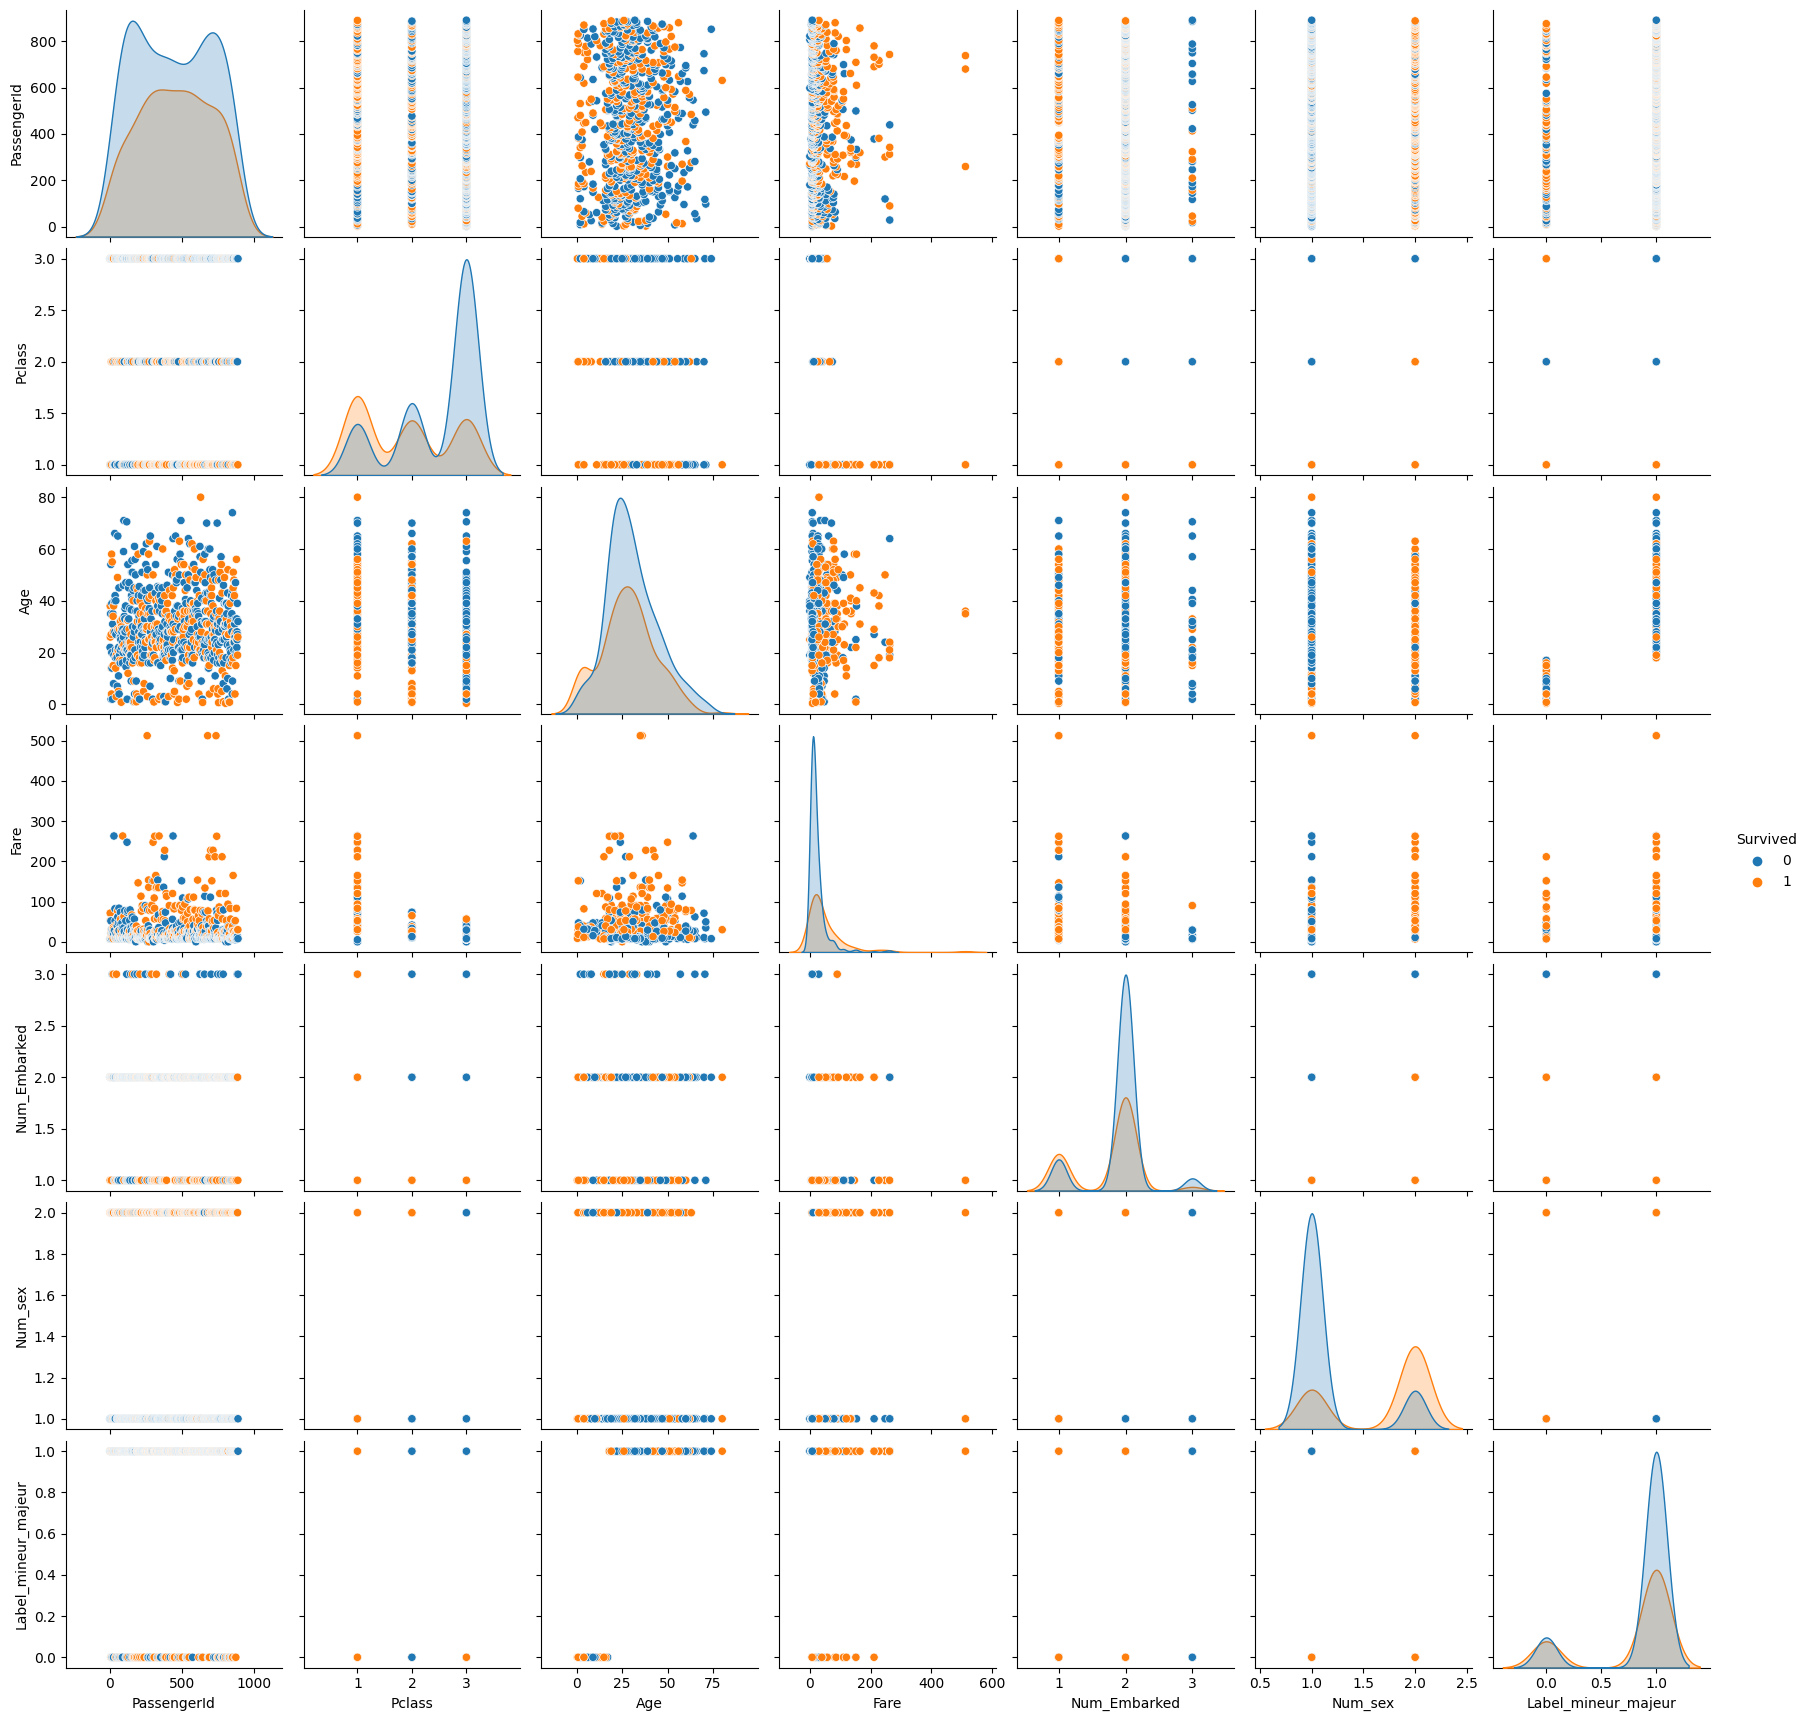

In [35]:
sns.pairplot(titanic_df_clean, hue='Survived')
plt.show()

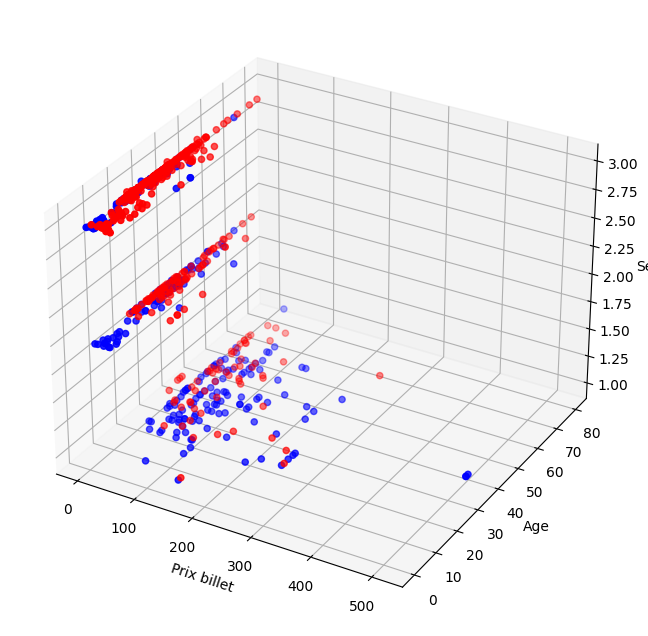

In [36]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(projection='3d')

ax.scatter(survived_df['Fare'], survived_df['Age'], survived_df['Pclass'], color='blue', label='Survived')
ax.scatter(unsurvived_df['Fare'], unsurvived_df['Age'], unsurvived_df['Pclass'], color='red', label='Dead')
ax.set_xlabel('Prix billet')
ax.set_ylabel('Age')
ax.set_zlabel('Sex')
plt.show()

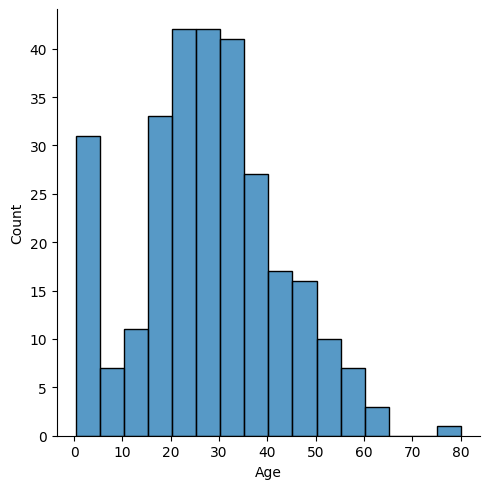

In [37]:
vis1=sns.displot(survived_df['Age'])

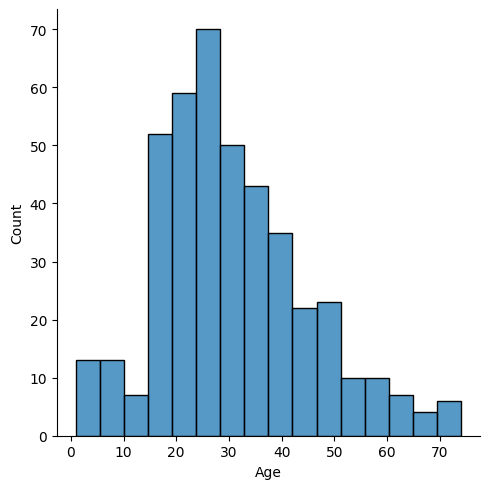

In [38]:
vis2=sns.displot(unsurvived_df['Age'])

A chercher   
preprocessing feature engineering

In [39]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# On sépare les features du target :
features, target = titanic_df_clean.loc[:, 'Pclass':'Num_Embarked'], titanic_df_clean["Survived"]

# On split notre dataframe en 2 :
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size = 0.4)

# On standardise :  
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

0.7052631578947368
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       168
           1       0.68      0.54      0.60       117

    accuracy                           0.71       285
   macro avg       0.70      0.68      0.68       285
weighted avg       0.70      0.71      0.70       285



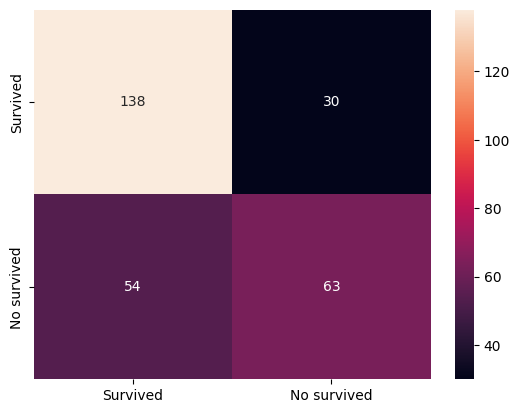

In [40]:
# SVC linear

# On initalise le modèle : 
classifier = SVC(kernel = 'linear')

# On l'entraîne sur nos données d'entraînement :
classifier.fit(feat_train, target_train)

# On l'utilise pour prédire sur les données de test :
predict_class = classifier.predict(feat_test)

# On calcule l'accuracy du modèle :  
acc = accuracy_score(predict_class, target_test)
print(acc)

# On ajoute des noms aux index et aux colonnes à la matrice de confusion
classes_names = ['Survived','No survived']
cm = pd.DataFrame(confusion_matrix(target_test, predict_class), 
                  columns=classes_names, index = classes_names)

# On affiche une heatmap de seaborn pour visualiser la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(target_test, predict_class))

Accuray et autre métrique un peu basse, test avec un algo de Knn

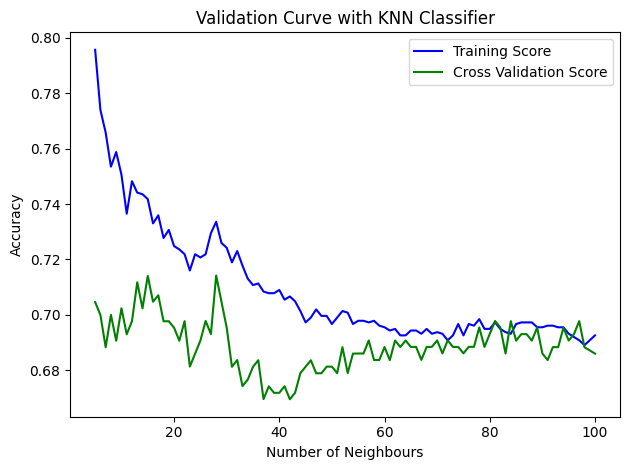

In [41]:
# Validation Curve
from sklearn.model_selection import validation_curve

parameter_range = np.linspace(5, 100, 95, dtype=int)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), 
                                       feat_train, 
                                       target_train,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean of training score
mean_train_score = np.mean(train_score, axis = 1)
 
# Calculating mean of testing score
mean_test_score = np.mean(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

kopti=parameter_range.take(mean_test_score.argmax())

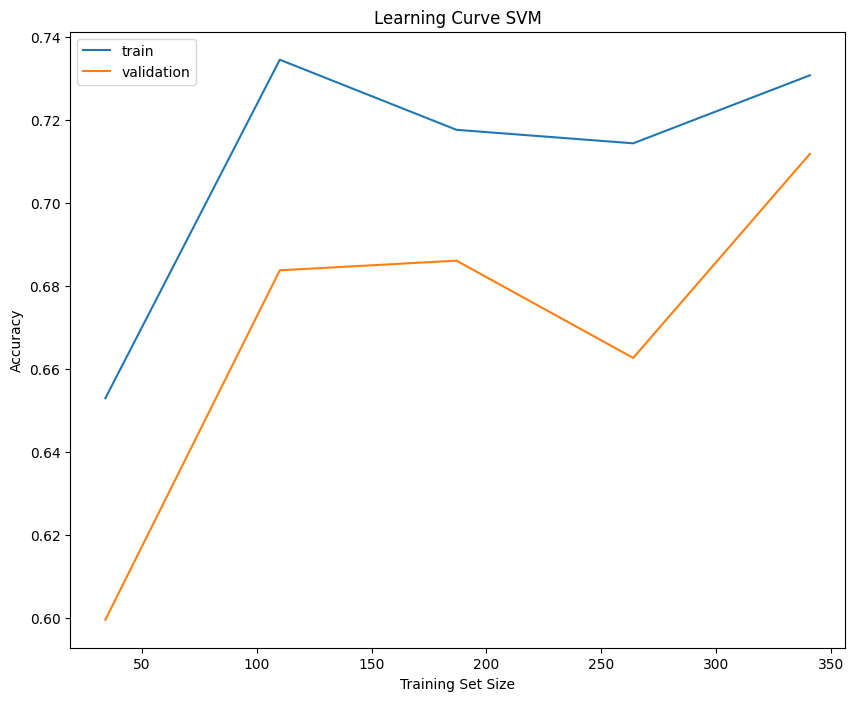

In [42]:
#scoring="neg_root_mean_squared_error"
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsClassifier(n_neighbors=kopti),
    X=feat_train,
    y=target_train,
    cv=5,
    scoring="accuracy"
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.show()

0.7298245614035088
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       168
           1       0.73      0.54      0.62       117

    accuracy                           0.73       285
   macro avg       0.73      0.70      0.71       285
weighted avg       0.73      0.73      0.72       285



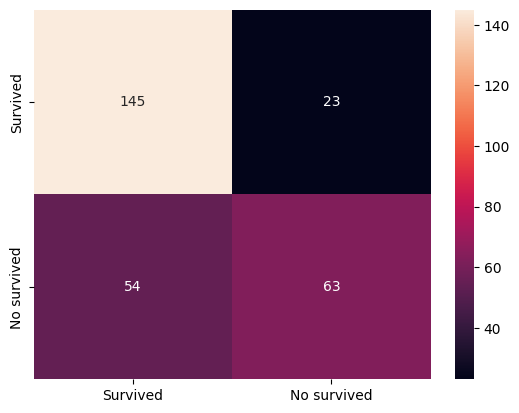

In [43]:
# On initalise le modèle : 
neighbors_classif = KNeighborsClassifier(n_neighbors=kopti)

# On l'entraîne sur nos données d'entraînement :
neighbors_classif.fit(feat_train, target_train)

# On l'utilise pour prédire sur les données de test :
predict_class = neighbors_classif.predict(feat_test)

# On calcule l'accuracy du modèle :  
acc = accuracy_score(predict_class, target_test)
print(acc)

# On ajoute des noms aux index et aux colonnes à la matrice de confusion
classes_names = ['Survived','No survived']
cm = pd.DataFrame(confusion_matrix(target_test, predict_class), 
                  columns=classes_names, index = classes_names)

# On affiche une heatmap de seaborn pour visualiser la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(target_test, predict_class))